<h1>Problem Statement </h1>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [66]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


<h1>Reading and Understanding Data (EDA)</h1>

In [2]:
house_df=pd.read_csv("train.csv")
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
house_df.shape

(1460, 81)

In [4]:
#checking datatype
print(house_df.dtypes.to_markdown())

|               | 0       |
|:--------------|:--------|
| Id            | int64   |
| MSSubClass    | int64   |
| MSZoning      | object  |
| LotFrontage   | float64 |
| LotArea       | int64   |
| Street        | object  |
| Alley         | object  |
| LotShape      | object  |
| LandContour   | object  |
| Utilities     | object  |
| LotConfig     | object  |
| LandSlope     | object  |
| Neighborhood  | object  |
| Condition1    | object  |
| Condition2    | object  |
| BldgType      | object  |
| HouseStyle    | object  |
| OverallQual   | int64   |
| OverallCond   | int64   |
| YearBuilt     | int64   |
| YearRemodAdd  | int64   |
| RoofStyle     | object  |
| RoofMatl      | object  |
| Exterior1st   | object  |
| Exterior2nd   | object  |
| MasVnrType    | object  |
| MasVnrArea    | float64 |
| ExterQual     | object  |
| ExterCond     | object  |
| Foundation    | object  |
| BsmtQual      | object  |
| BsmtCond      | object  |
| BsmtExposure  | object  |
| BsmtFinType1  | ob

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Missing values percentage in each column overview
print(((house_df.isna().sum()/len(house_df.index))*100).to_markdown())

|               |          0 |
|:--------------|-----------:|
| Id            |  0         |
| MSSubClass    |  0         |
| MSZoning      |  0         |
| LotFrontage   | 17.7397    |
| LotArea       |  0         |
| Street        |  0         |
| Alley         | 93.7671    |
| LotShape      |  0         |
| LandContour   |  0         |
| Utilities     |  0         |
| LotConfig     |  0         |
| LandSlope     |  0         |
| Neighborhood  |  0         |
| Condition1    |  0         |
| Condition2    |  0         |
| BldgType      |  0         |
| HouseStyle    |  0         |
| OverallQual   |  0         |
| OverallCond   |  0         |
| YearBuilt     |  0         |
| YearRemodAdd  |  0         |
| RoofStyle     |  0         |
| RoofMatl      |  0         |
| Exterior1st   |  0         |
| Exterior2nd   |  0         |
| MasVnrType    |  0.547945  |
| MasVnrArea    |  0.547945  |
| ExterQual     |  0         |
| ExterCond     |  0         |
| Foundation    |  0         |
| BsmtQu

In [7]:
#Dropping null values from Electrical column as its a small percentage
house_df["Electrical"].dropna(inplace=True)

There are several other Columns with lot of missing values, but according to data dictionary they represents that particular facilty is not provided. Hence keeping them and Applying imputations on missing values


<h3>1. First taking all the categorical type columns for the imputation, we will impute NA with None</li>

In [8]:

Cat_col_nulls = ["GarageFinish", "GarageQual", "GarageCond", "PoolQC", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType","Fence", "MiscFeature","Alley", "MasVnrType", "BsmtQual"]
for i in Cat_col_nulls:
    house_df[i].fillna("none", inplace=True)

In [9]:
#Missing values percentage in each column overview
print(((house_df.isna().sum()/len(house_df.index))*100).to_markdown())

|               |          0 |
|:--------------|-----------:|
| Id            |  0         |
| MSSubClass    |  0         |
| MSZoning      |  0         |
| LotFrontage   | 17.7397    |
| LotArea       |  0         |
| Street        |  0         |
| Alley         |  0         |
| LotShape      |  0         |
| LandContour   |  0         |
| Utilities     |  0         |
| LotConfig     |  0         |
| LandSlope     |  0         |
| Neighborhood  |  0         |
| Condition1    |  0         |
| Condition2    |  0         |
| BldgType      |  0         |
| HouseStyle    |  0         |
| OverallQual   |  0         |
| OverallCond   |  0         |
| YearBuilt     |  0         |
| YearRemodAdd  |  0         |
| RoofStyle     |  0         |
| RoofMatl      |  0         |
| Exterior1st   |  0         |
| Exterior2nd   |  0         |
| MasVnrType    |  0         |
| MasVnrArea    |  0.547945  |
| ExterQual     |  0         |
| ExterCond     |  0         |
| Foundation    |  0         |
| BsmtQu

<h3>2. Now taking all the numerical type columns for the imputation, first lets check the description and decide on the imputation technique


In [10]:

house_df[['GarageYrBlt','MasVnrArea','MasVnrArea','LotFrontage']].describe()


,GarageYrBlt,MasVnrArea,MasVnrArea,LotFrontage
count,1379.000000,1452.000000,1452.000000,1201.000000
mean,1978.506164,103.685262,103.685262,70.049958
std,24.689725,181.066207,181.066207,24.284752
min,1900.000000,0.000000,0.000000,21.000000
25%,1961.000000,0.000000,0.000000,59.000000
50%,1980.000000,0.000000,0.000000,69.000000
75%,2002.000000,166.000000,166.000000,80.000000
max,2010.000000,1600.000000,1600.000000,313.000000


In [11]:
#Imputing with Median values
house_df["MasVnrArea"].fillna(house_df["MasVnrArea"].median(), inplace=True)
house_df["GarageYrBlt"].fillna(house_df["GarageYrBlt"].median(), inplace=True)


In [12]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property hence it can be imputed with similar 'Neighborhood' values
house_df['LotFrontage'] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
#checking unique values in each column
print(house_df.nunique().to_markdown())

|               |    0 |
|:--------------|-----:|
| Id            | 1460 |
| MSSubClass    |   15 |
| MSZoning      |    5 |
| LotFrontage   |  115 |
| LotArea       | 1073 |
| Street        |    2 |
| Alley         |    3 |
| LotShape      |    4 |
| LandContour   |    4 |
| Utilities     |    2 |
| LotConfig     |    5 |
| LandSlope     |    3 |
| Neighborhood  |   25 |
| Condition1    |    9 |
| Condition2    |    8 |
| BldgType      |    5 |
| HouseStyle    |    8 |
| OverallQual   |   10 |
| OverallCond   |    9 |
| YearBuilt     |  112 |
| YearRemodAdd  |   61 |
| RoofStyle     |    6 |
| RoofMatl      |    8 |
| Exterior1st   |   15 |
| Exterior2nd   |   16 |
| MasVnrType    |    5 |
| MasVnrArea    |  327 |
| ExterQual     |    4 |
| ExterCond     |    5 |
| Foundation    |    6 |
| BsmtQual      |    5 |
| BsmtCond      |    5 |
| BsmtExposure  |    5 |
| BsmtFinType1  |    7 |
| BsmtFinSF1    |  637 |
| BsmtFinType2  |    7 |
| BsmtFinSF2    |  144 |
| BsmtUnfSF     |  780 |


In [14]:
#from the given data we can see that id is an index column so we drop it,

house_df2=house_df.drop(['Id'],axis=1)

In [15]:
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<h3> Outlier detection </h3>

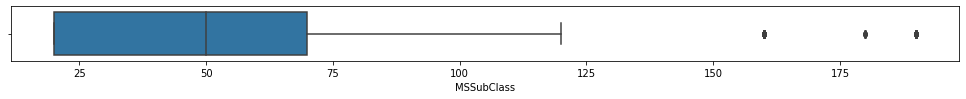

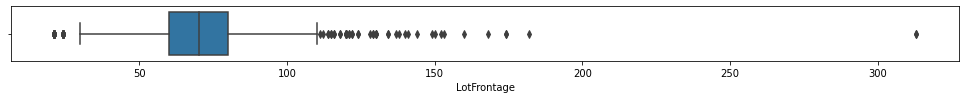

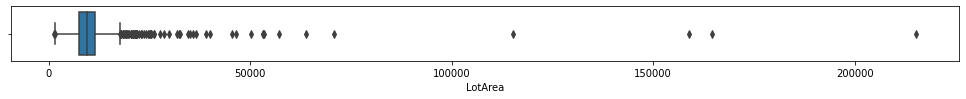

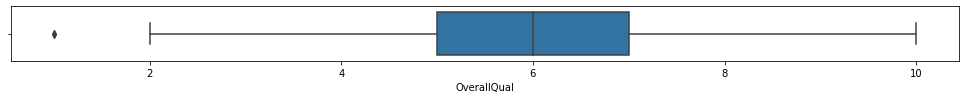

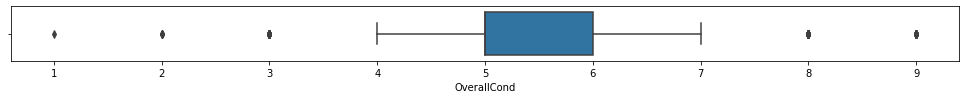

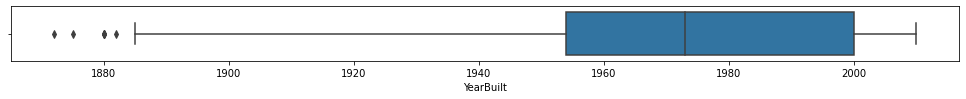

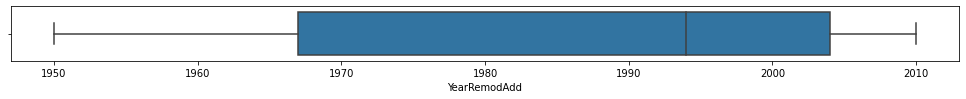

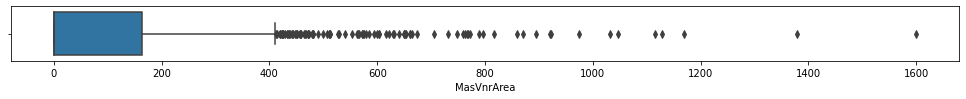

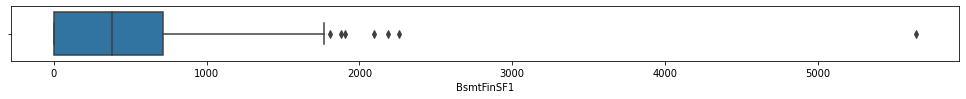

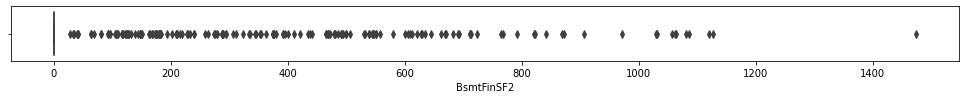

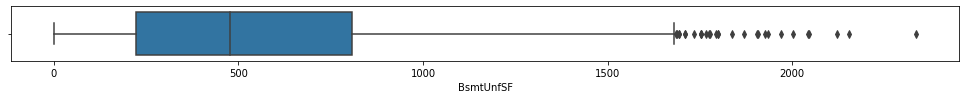

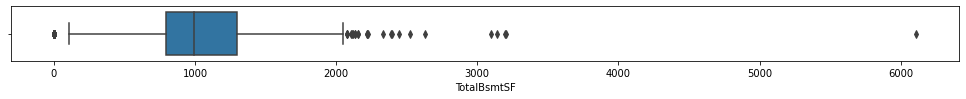

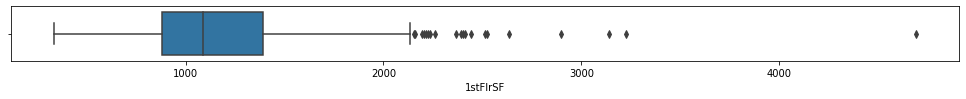

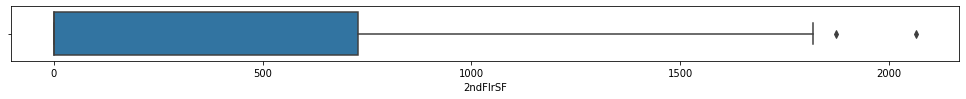

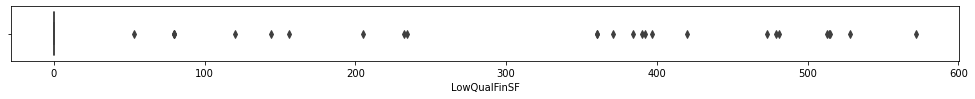

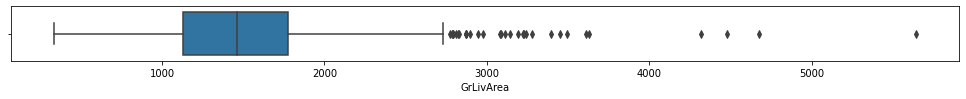

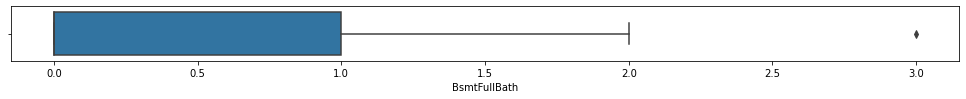

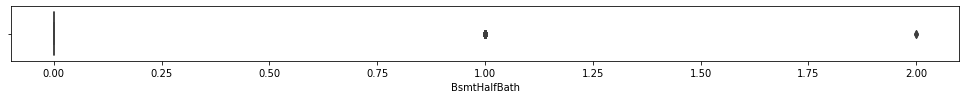

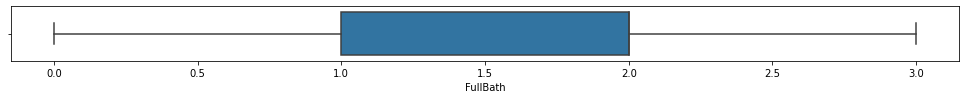

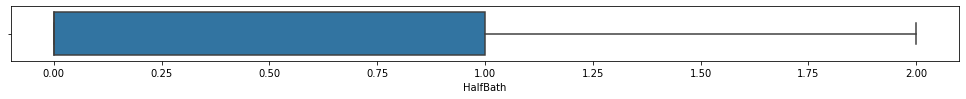

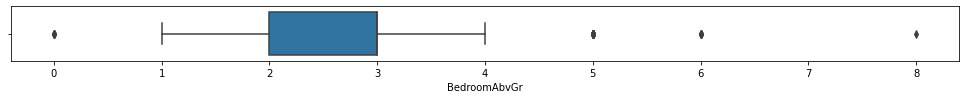

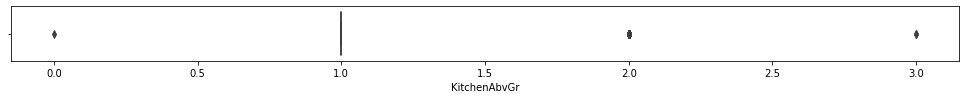

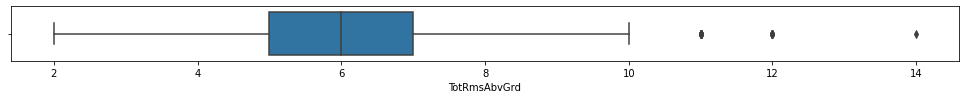

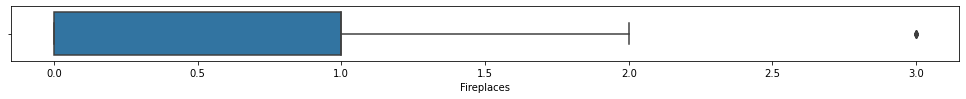

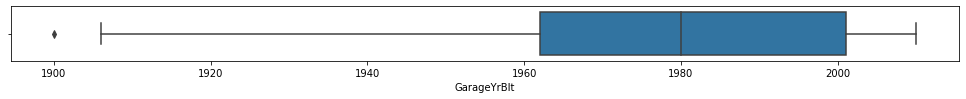

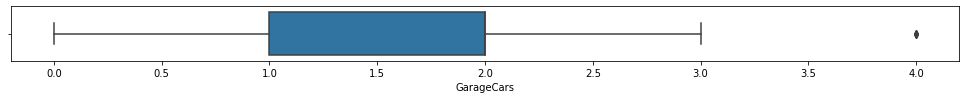

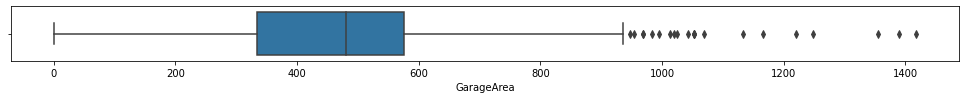

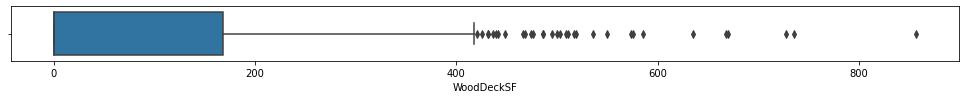

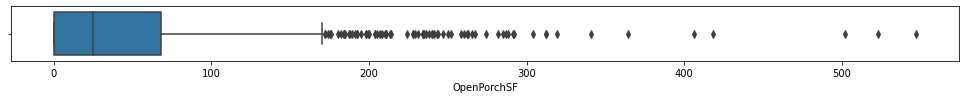

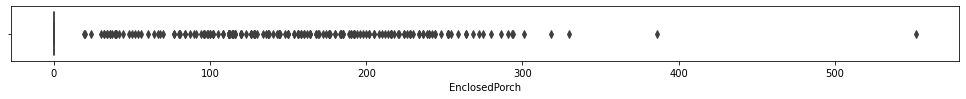

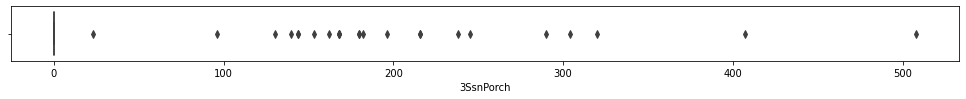

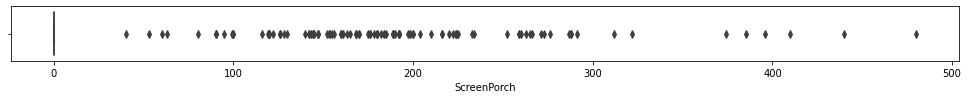

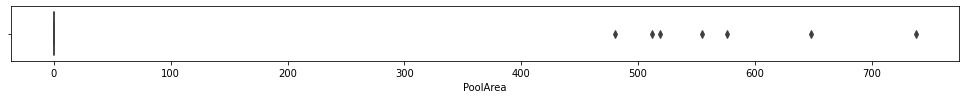

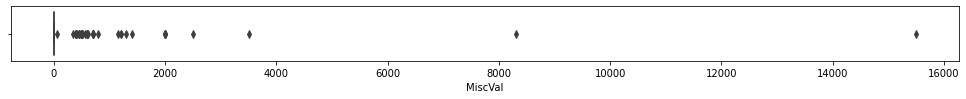

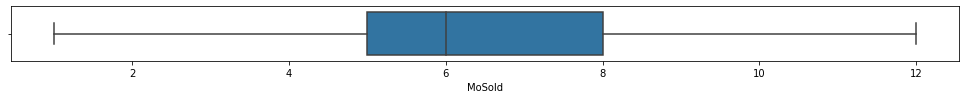

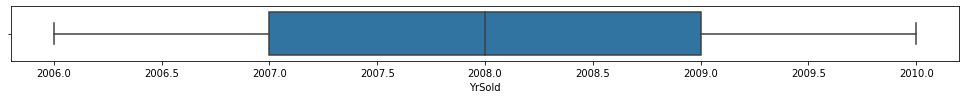

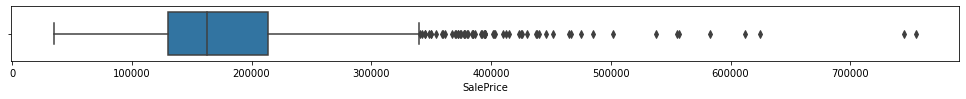

In [16]:
#Plotting box plots outlier detection
house_sel_col=house_df2.select_dtypes(exclude=['object'])
for column in house_sel_col:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=house_df2, x=column)

<h3>As the data set is very less it is not advisable to remove outliers to reduce rows

<h1>Univariate Analysis</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

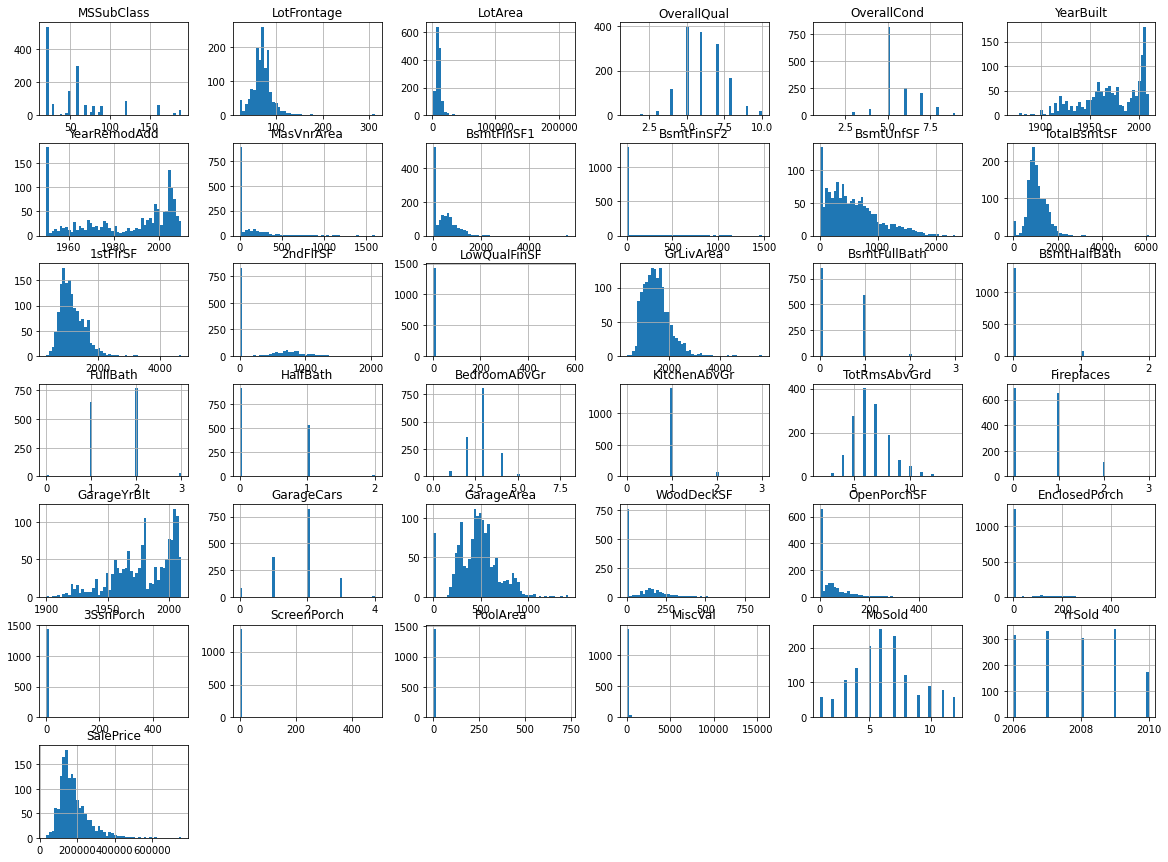

In [17]:
#check distribution of all the variables in house data
house_df2.hist(bins = 50, figsize = (20,15))
plt.show

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

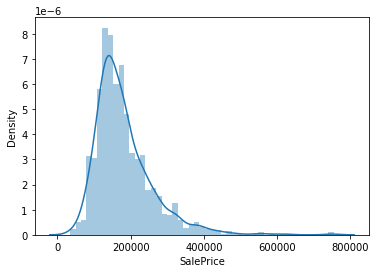

In [18]:
sns.distplot(house_df2['SalePrice'])

We can observe the sales is left skewed hence we will apply log transformation to make it normally distributed

In [19]:
#Log Transformation
house_df2['SalePrice']=np.log1p(house_df2['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

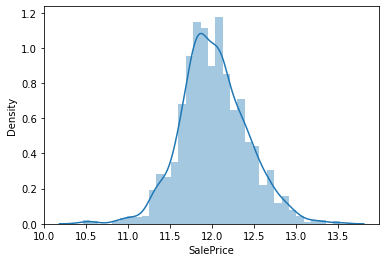

In [20]:
sns.distplot(house_df2['SalePrice'])

<h1>Bivariate Analysis

In [21]:
#Checking correlation
corr=house_df2.corr()
corr.style.background_gradient(cmap='coolwarm') 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.353288
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


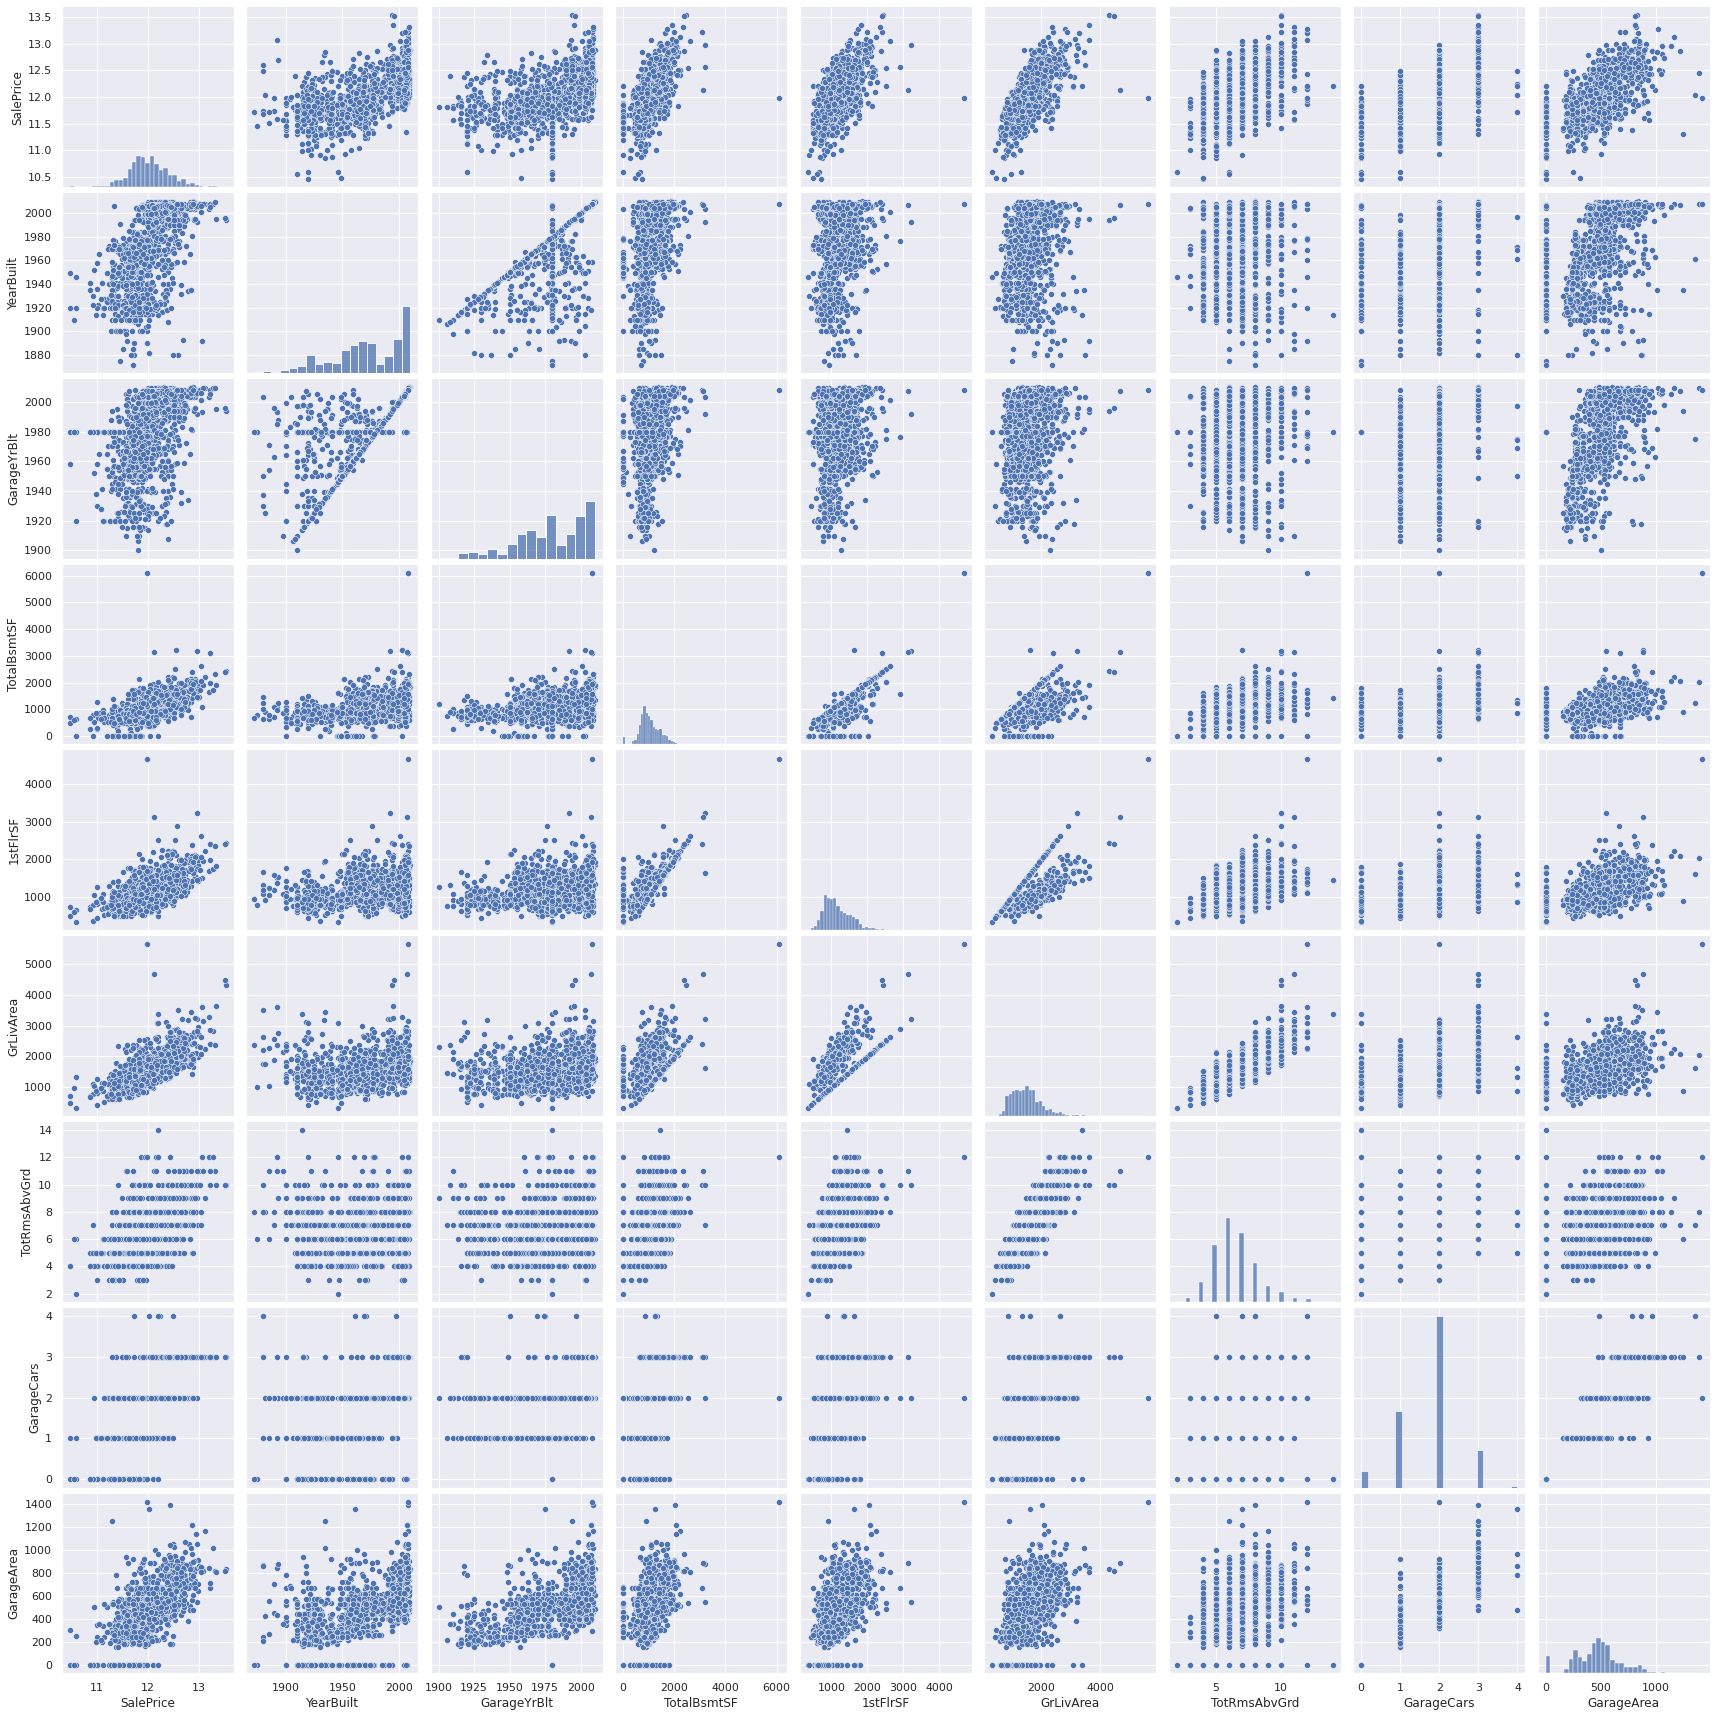

In [24]:
#There are many columns with very high correlation such as- YearBuilt,GarageYrBlt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea

# Lets check their predictive power through -Pairplot
sns.set()
col = ['SalePrice', 'YearBuilt','GarageYrBlt','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea']
sns.pairplot(house_df2[col], size = 2.7)
plt.show()

In [25]:
#Dropping highly correlated columns which shows less effect on sale price
house_df2 = house_df2.drop(['GarageCars'], axis = 1)
house_df2 = house_df2.drop(['TotRmsAbvGrd'], axis = 1)
house_df2 = house_df2.drop(['GarageYrBlt'], axis = 1)    

<h1> Derived columns

In [26]:
# Derived column property age
house_df2['prop_age'] = (house_df2['YrSold'] - house_df2['YearBuilt'])
house_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prop_age
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


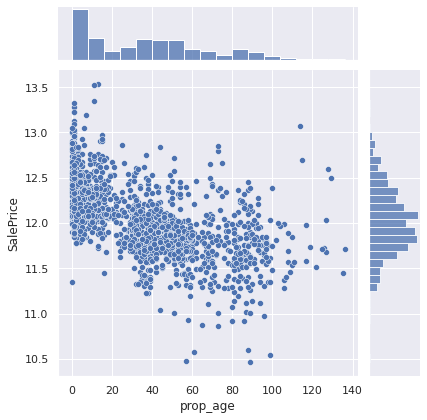

In [27]:
# Property age vs SalePrice
sns.jointplot(x = house_df2['prop_age'], y = house_df2['SalePrice'])
plt.show()

In [28]:
#Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
house_df2 = house_df2.drop(['MoSold'], axis = 1)
house_df2 = house_df2.drop(['YrSold'], axis = 1)
house_df2 = house_df2.drop(['YearBuilt'], axis = 1)
house_df2 = house_df2.drop(['YearRemodAdd'], axis = 1)
house_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,prop_age
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,12.429220,8


<h2> Dummy Variable creation

In [38]:
# subset all categorical variables
house_categorical = house_df2.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


In [39]:
#data preparation
house_df3 = pd.get_dummies(house_categorical, drop_first=True )
house_df3.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# drop categorical variables 
house_df2 = house_df2.drop(list(house_categorical.columns), axis=1)

In [43]:
# concat dummy variables with X
house_df2 = pd.concat([house_df2, house_df3], axis=1)

In [44]:
house_df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,0,0,0,0,1,0,0,0,1,0


<h1> Model Building and Evaluation</h1>
<h3> 1. Model using Linear Regression and RFE

In [45]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(house_df2, train_size = 0.7, test_size = 0.3, random_state = 42)


In [50]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,80.0,10400,7,6,288.0,0,0,1304,1304,...,0,0,0,0,1,0,0,0,1,0
1452,180,35.0,3675,5,5,80.0,547,0,0,547,...,0,0,0,0,1,0,0,0,1,0
762,60,72.0,8640,7,5,0.0,24,0,732,756,...,0,0,0,0,0,0,0,0,1,0
932,20,84.0,11670,9,5,302.0,0,0,1905,1905,...,0,0,0,0,1,0,0,0,1,0
435,60,43.0,10667,7,6,0.0,385,344,70,799,...,0,1,0,0,0,0,0,0,1,0


In [51]:
# Taking SalePrice as the target variable in y_train and x_train will have rest of the dataframe values aprt from target variable
y_train = train.pop('SalePrice')
X_train = train

In [52]:
# Running RFE 
# Since there are more than 255 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [53]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 132),
 ('LotFrontage', False, 125),
 ('LotArea', False, 149),
 ('OverallQual', True, 1),
 ('OverallCond', False, 58),
 ('MasVnrArea', False, 147),
 ('BsmtFinSF1', False, 143),
 ('BsmtFinSF2', False, 142),
 ('BsmtUnfSF', False, 150),
 ('TotalBsmtSF', False, 138),
 ('1stFlrSF', False, 140),
 ('2ndFlrSF', False, 139),
 ('LowQualFinSF', False, 136),
 ('GrLivArea', False, 129),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 67),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 34),
 ('KitchenAbvGr', False, 116),
 ('Fireplaces', True, 1),
 ('GarageArea', False, 134),
 ('WoodDeckSF', False, 141),
 ('OpenPorchSF', False, 148),
 ('EnclosedPorch', False, 137),
 ('3SsnPorch', False, 135),
 ('ScreenPorch', False, 133),
 ('PoolArea', False, 119),
 ('MiscVal', False, 144),
 ('prop_age', False, 128),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 118),
 ('Alley_Pav

In [54]:
# Select the top 100 variables

col_100 = X_train.columns[rfe.support_]
col_100

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Alley_Pave', 'LotShape_IR3', 'Utilities_NoSeWa', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition2_Feedr', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar

In [55]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=154)

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_100]

In [57]:
X_train_rfe

,OverallQual,BsmtFullBath,FullBath,HalfBath,Fireplaces,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,...,GarageCond_TA,GarageCond_none,PoolQC_Fa,PoolQC_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_ConLI,SaleCondition_Partial
135,7,0,2,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1452,5,1,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
762,7,0,2,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
932,9,0,2,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
435,7,1,2,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,8,1,2,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1095,6,0,2,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1130,4,1,2,0,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1294,5,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
y_test = test.pop('SalePrice')
X_test = test

In [64]:
#Checking R2, RMSE, RSS FOR LINEAR REGRESSION MODEL
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9470534631111257
0.8467076948053014
8.387381783421787
11.390238569873665
0.008214869523429763
0.026005110890122522


<h3> 2. Model using RIDGE

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [194]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.80679464e-04 -5.52378339e-04  1.67995094e-06  6.60860637e-02
  4.20995503e-02 -3.81647044e-05 -3.15979646e-05  2.82393518e-05
 -1.48366641e-05 -1.81952789e-05  5.03857373e-05  3.55487781e-05
  1.13863682e-04  1.99798195e-04  5.29827684e-02  1.09525616e-02
  3.18375852e-02  2.85045032e-02  2.10799035e-02 -6.55231577e-03
  2.34034750e-02  1.66416398e-04  1.21386385e-04 -5.47256141e-05
  1.85352565e-04  2.66869876e-04  3.17471371e-04 -2.77930917e-04
 -5.90905726e-06 -2.07456034e-03  2.43463986e-02  1.64132167e-03
  3.28886061e-02 -2.50996226e-02  1.68961875e-03  2.56879610e-02
 -2.37317637e-02  1.88376229e-02 -3.75430839e-02 -2.09236262e-04
  5.26928339e-02  1.74855036e-02  4.18380706e-02 -9.79643551e-03
  2.65578384e-02 -1.80689621e-02 -5.38028954e-03 -1.34179827e-02
  9.41687027e-03  3.93379223e-03 -4.22477668e-03 -9.99390229e-03
  2.10825132e-02  2.84789572e-02 -2.50837188e-02  7.19367179e-02
 -5.50808456e-02 -2.42181230e-02 -2.98708673e-02 -3.75043269e-02
 -1.26096217e-02 -2.30570

In [195]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9084640348595607
0.8939236193073847
14.500421210894718
7.8819043211792845
0.014202175524872398
0.017995215345158185


<H3> 3. Model using LASSO

In [104]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [189]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [190]:
lasso.coef_

array([-4.40864678e-04,  1.65430345e-04,  1.48209413e-06,  4.87127446e-02,
        4.07364099e-02,  3.32626939e-06,  4.59027445e-05,  6.73492467e-05,
        2.33258150e-05,  1.51880454e-05,  2.12659461e-04,  2.02214607e-04,
        3.58591802e-04,  2.34972230e-05,  3.70349491e-02,  3.15402526e-03,
        2.56586181e-02,  2.89547253e-02,  1.31298645e-02, -3.48126490e-02,
        1.80861905e-02,  1.64236364e-04,  9.92915004e-05, -2.22437427e-06,
        1.57971183e-04,  2.01460565e-04,  2.46950498e-04,  6.83137642e-03,
       -9.84829454e-06, -1.99232504e-03,  1.54818271e-01,  1.22999429e-01,
        1.42319991e-01,  1.09939004e-01,  0.00000000e+00,  6.21439108e-02,
       -2.03201305e-02,  2.92455931e-02, -0.00000000e+00,  2.98796093e-03,
        7.96792615e-02,  2.69969728e-02,  6.25640704e-02, -7.67782780e-02,
        3.25965000e-02, -3.21966606e-02, -5.45009020e-02, -8.92654665e-03,
       -3.77344233e-03, -0.00000000e+00, -0.00000000e+00, -1.05553949e-02,
        2.24230395e-02,  

In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9409894041793858
0.8755950054873416
9.348003202806042
9.243794494337143
0.009155732813717966
0.021104553640039138


In [183]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.947053,0.908464,0.932861
1,R2 Score (Test),0.846708,0.893924,0.881840
2,RSS (Train),8.387382,14.500421,10.635631
3,RSS (Test),11.390239,7.881904,8.779787
4,MSE (Train),0.090636,0.119173,0.102063
5,MSE (Test),0.161261,0.134146,0.141581


We can see Ridge model is better model than lasso and linear regression in terms of R2 for training and testing set

<H3>Lets observe the changes in the coefficients after regularization

In [171]:
betas = pd.DataFrame(index=X_train.columns)

In [172]:
betas.rows = house_df3.columns

In [173]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [174]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-1.012608e-04,-0.000781,-0.000441
LotFrontage,4.423898e-04,-0.000552,0.000165
LotArea,2.379633e-06,0.000002,0.000001
OverallQual,4.294057e-02,0.066086,0.048713
OverallCond,4.072881e-02,0.042100,0.040736
MasVnrArea,7.888284e-06,-0.000038,0.000003
BsmtFinSF1,4.072943e-05,-0.000032,0.000046
BsmtFinSF2,4.597808e-05,0.000028,0.000067
BsmtUnfSF,-6.878274e-07,-0.000015,0.000023
TotalBsmtSF,8.602022e-05,-0.000018,0.000015


<h3>Ridge is better performing model but we will go with lasso as it does the feature engineering and tells us the significant features

In [175]:
# ridge model parameters
model_parameters = list(ridge.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.03),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.053),
 ('BsmtHalfBath', 0.011),
 ('FullBath', 0.032),
 ('HalfBath', 0.029),
 ('BedroomAbvGr', 0.021),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.023),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('prop_age', -0.002),
 ('MSZoning_FV', 0.024),
 ('MSZoning_RH', 0.002),
 ('MSZoning_RL', 0.033),
 ('MSZoning_RM', -0.025),
 ('Street_Pave', 0.002),
 ('Alley_Pave', 0.026),
 ('Alley_none', -0.024),
 ('LotShape_IR2', 0.019),
 ('LotShape_IR3', -0.038),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.053),
 ('L

In [176]:
# Creating a dataframe for the coefficients obtained from ridge
mod_ridge = list(zip(cols, model_parameters))

In [177]:
para_ridge = pd.DataFrame(mod_ridge)
para_ridge.columns = ['Variable', 'Coeff']
para_ridge.head()

,Variable,Coeff
0,constant,7.030
1,MSSubClass,-0.001
2,LotFrontage,-0.001
3,LotArea,0.000
4,OverallQual,0.066


In [178]:
# sort the coefficients in ascending order
para_ridge = para_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
para_ridge

,Variable,Coeff
0,constant,7.030
56,Neighborhood_Crawfor,0.072
4,OverallQual,0.066
72,Neighborhood_StoneBr,0.064
66,Neighborhood_NridgHt,0.061
115,Exterior1st_BrkFace,0.058
204,Functional_Typ,0.054
41,LandContour_HLS,0.053
15,BsmtFullBath,0.053
76,Condition1_Norm,0.052


In [184]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 8.864),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.053),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.042),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.028),
 ('HalfBath', 0.03),
 ('BedroomAbvGr', 0.017),
 ('KitchenAbvGr', -0.027),
 ('Fireplaces', 0.018),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.004),
 ('MiscVal', -0.0),
 ('prop_age', -0.002),
 ('MSZoning_FV', 0.045),
 ('MSZoning_RH', 0.001),
 ('MSZoning_RL', 0.039),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 0.0),
 ('Alley_Pave', 0.057),
 ('Alley_none', -0.019),
 ('LotShape_IR2', 0.026),
 ('LotShape_IR3', -0.028),
 ('LotShape_Reg', 0.001),
 ('LandContour_HLS', 0.083),
 ('LandContour

In [185]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [186]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,8.864
1,MSSubClass,-0.001
2,LotFrontage,-0.000
3,LotArea,0.000
4,OverallQual,0.053


In [188]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
print(para.to_markdown())

|     | Variable              |   Coeff |
|----:|:----------------------|--------:|
|   0 | constant              |   8.864 |
| 233 | PoolQC_none           |   1.933 |
| 251 | SaleCondition_Alloca  |   0.199 |
|  72 | Neighborhood_StoneBr  |   0.134 |
|  56 | Neighborhood_Crawfor  |   0.123 |
|  66 | Neighborhood_NridgHt  |   0.09  |
| 244 | SaleType_ConLD        |   0.089 |
| 115 | Exterior1st_BrkFace   |   0.088 |
|  41 | LandContour_HLS       |   0.083 |
| 254 | SaleCondition_Partial |   0.071 |
|  43 | LandContour_Lvl       |   0.067 |
| 191 | CentralAir_Y          |   0.064 |
| 226 | GarageCond_Po         |   0.063 |
|  36 | Alley_Pave            |   0.057 |
|  54 | Neighborhood_ClearCr  |   0.057 |
| 204 | Functional_Typ        |   0.055 |
|  76 | Condition1_Norm       |   0.053 |
|   4 | OverallQual           |   0.053 |
| 166 | BsmtExposure_Gd       |   0.052 |
| 253 | SaleCondition_Normal  |   0.05  |
|  65 | Neighborhood_NoRidge  |   0.049 |
| 164 | BsmtCond_TA           |   

In [142]:
para.shape

(255, 2)

In [179]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
print(pred.to_markdown())

|     | Variable              |   Coeff |
|----:|:----------------------|--------:|
|   0 | constant              |   7.03  |
| 233 | PoolQC_none           |   3.632 |
| 251 | SaleCondition_Alloca  |   0.207 |
|  31 | MSZoning_FV           |   0.155 |
| 226 | GarageCond_Po         |   0.148 |
|  33 | MSZoning_RL           |   0.142 |
|  72 | Neighborhood_StoneBr  |   0.136 |
|  32 | MSZoning_RH           |   0.123 |
|  56 | Neighborhood_Crawfor  |   0.12  |
| 248 | SaleType_Oth          |   0.115 |
| 244 | SaleType_ConLD        |   0.114 |
|  34 | MSZoning_RM           |   0.11  |
| 186 | Heating_Wall          |   0.095 |
| 250 | SaleCondition_AdjLand |   0.09  |
| 115 | Exterior1st_BrkFace   |   0.09  |
| 183 | Heating_GasW          |   0.085 |
|  66 | Neighborhood_NridgHt  |   0.084 |
|  41 | LandContour_HLS       |   0.08  |
| 191 | CentralAir_Y          |   0.068 |
|  83 | Condition2_Feedr      |   0.064 |
|  76 | Condition1_Norm       |   0.064 |
|  74 | Neighborhood_Veenker  |   

In [145]:
pred.shape

(174, 2)

<h1>INFERENCE</h1>
<h2>Suggestions for Surprise Housing is to keep an eye on these features for house price<h2>
<h3> Top 5 Features that positively affect the house price</h3>
<li>PoolQC_none
<li>SaleCondition_Alloca
<li>MSZoning_FV
<li>GarageCond_Po
<li>MSZoning_RL
<h3> Top 5 Features that negatively affect the house price</h3>
<li>PoolQC_Gd
<li>Condition2_PosN
<li>Functional_Maj2
<li>Functional_Sev
<li>Heating_Grav
